# Практическое задание

## Задачи

1. Написать свою реализацию метода главных компонент
с помощью сингулярного разложения с использованием функции
[numpy.linalg.svd()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html).

2. Обучить любую модель классификации на датасете IRIS
до применения PCA и после него.
Сравнить качество классификации по отложенной выборке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from problem_1_pca import pca_eigens, pca_singulars, pca
from example_1_scatter import scatter

### Set parameters

In [2]:
seed = 42

split_params = dict(
    test_size=.2,
    random_state=seed
)

### Load dataset and make standardization

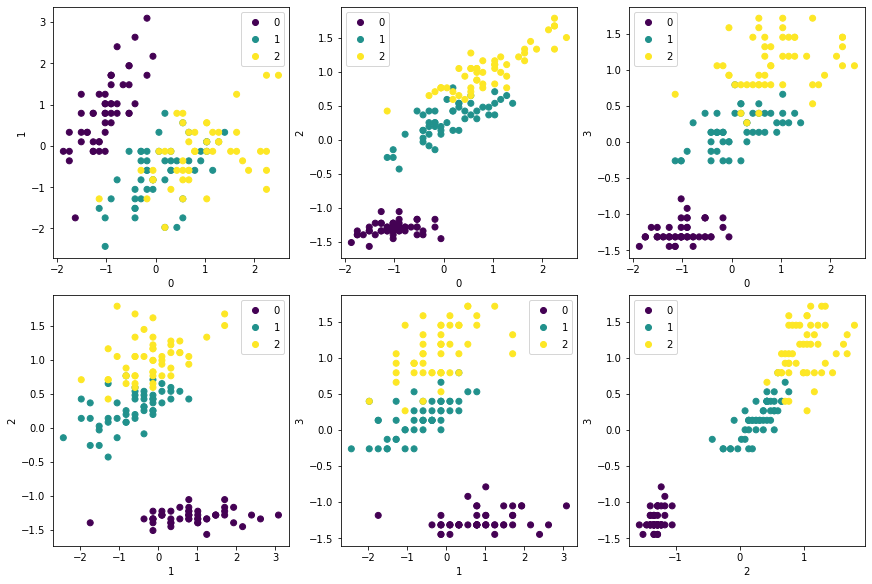

In [3]:
X, y = load_iris(return_X_y=True)
X = (X - X.mean(axis=0)) / X.std(axis=0)

scatter(X, y, ncols=3, figsize=(4, 4))

### Calculate PCA eigen and singular values

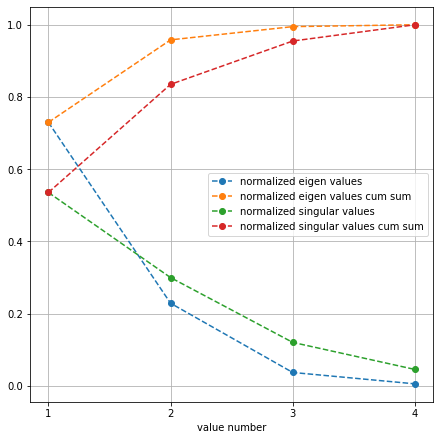

In [4]:
eigens = [_[0] for _ in pca_eigens(X)] 
normalized_eigens = [_ / sum(eigens) for _ in eigens]
cumsum_eigens = np.cumsum(normalized_eigens)

singulars = [_[0] for _ in pca_singulars(X)] 
normalized_singulars = [_ / sum(singulars) for _ in singulars]
cumsum_singulars = np.cumsum(normalized_singulars)

value_numbers = range(1, len(eigens) + 1)
plot_data = {
    'normalized eigen values': normalized_eigens,
    'normalized eigen values cum sum': cumsum_eigens,
    'normalized singular values': normalized_singulars,
    'normalized singular values cum sum': cumsum_singulars
}
    
_, axis = plt.subplots(
    figsize=(6, 6),
    constrained_layout=True
)

for label, values in plot_data.items():
    axis.plot(
        value_numbers, values,
        'o--', label=label
    )

axis.set(
    xticks=value_numbers,
    xlabel='value number'
)
axis.grid()
axis.legend()

plt.show()

### Make PCA

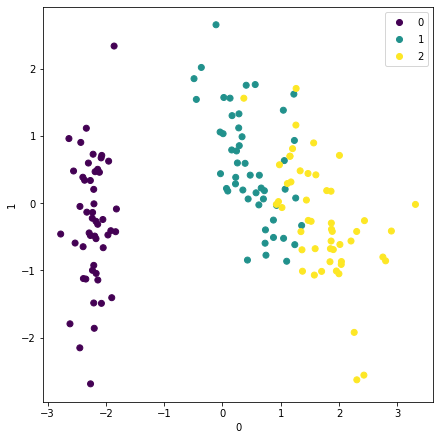

In [5]:
Z = pca(X, d=2)

scatter(Z, y, figsize=(6, 6))

### Make predictions and calculate scores

In [6]:
datasets = {
    f'{X.shape}': X,
    f'{Z.shape}': Z
}

train_test_datasets = {
    key: train_test_split(dataset, y, **split_params)
    for key, dataset in datasets.items()
}

classifier = LogisticRegression()

scores = {
    key: classifier.fit(X_train, y_train).score(X_test, y_test)
    for key, (X_train, X_test, y_train, y_test)
    in train_test_datasets.items()
}

for _ in scores.items():
    print('{}: {:.3g}'.format(*_))

(150, 4): 1
(150, 2): 0.9
